# Working with Vector Data in Python

Python has a large ecosystem of packages to work with Geospatial data. The most important packages to work with Vector data are:

- [Pandas/Geopandas](https://geopandas.org/en/stable/): a module used to interact with geospatial data. With geopandas a users can manage filepaths, read spatial data from file, calculate geometries, write spatial data to file, group and split spatial data into multiple layers. to name just a few. Geopandas combines the capabilities of the data analysis library [pandas](https://pandas.pydata.org/pandas-docs/stable/) with other packages like [shapely](https://shapely.readthedocs.io/en/stable/manual.html) and [fiona](https://fiona.readthedocs.io/en/latest/manual.html) for managing spatial data. The main data structures in geopandas are `GeoSeries` and `GeoDataFrame` which extend the capabilities of `Series` and `DataFrames` from pandas.
- [Shapely](https://shapely.readthedocs.io/en/stable/manual.html): a module used to create and manipulate geometries-shapes in python such as (multi-)points, (multi-)lines, (multi-)polygons. The module is based on the well known GEOS (Geometry Engine - Open Source). More information available at [Shapely-documentation](https://shapely.readthedocs.io/en/stable/index.html).
- pyproj
- matplotlib



## Shapely and geometric objects

![Spatial data model](https://autogis-site.readthedocs.io/en/2019/_images/SpatialDataModel.PNG)

*Fundamental geometric objects that can be used in Python with* [Shapely](https://shapely.readthedocs.io/en/stable/geometry.html).

The most fundamental geometric objects are `Points`, `Lines` and `Polygons` which are the basic ingredients when working with spatial data in vector format. 
Python has a specific module called [Shapely](https://shapely.readthedocs.io/en/stable/manual.html) for doing various geometric operations. Basic knowledge of using Shapely is fundamental for understanding how geometries are stored and handled in GeoPandas.

**Geometric objects consist of coordinate tuples where:**

-  `Point` -object represents a single point in space. Points can be either two-dimensional (x, y) or three dimensional (x, y, z).
-  `LineString` -object (i.e. a line) represents a sequence of points joined together to form a line. Hence, a line consist of a list of at least two coordinate tuples
-  `Polygon` -object represents a filled area that consists of a list of at least three coordinate tuples that forms the outerior ring and a (possible) list of hole polygons.

**It is also possible to have a collection of geometric objects (e.g. Polygons with multiple parts):**

-  `MultiPoint` -object represents a collection of points and consists of a list of coordinate-tuples
-  `MultiLineString` -object represents a collection of lines and consists of a list of line-like sequences
-  `MultiPolygon` -object represents a collection of polygons that consists of a list of polygon-like sequences that construct from exterior ring and (possible) hole list tuples

**Useful attributes and methods in Shapely include:**

-  Creating lines and polygons based on a collection of point objects.
-  Calculating areas/length/bounds etc. of input geometries
-  Conducting geometric operations based on the input geometries such as `union`, `difference`, `distance` etc.
-  Conducting spatial queries between geometries such as `intersects`, `touches`, `crosses`, `within` etc.

### Point

Creating point is easy, you pass x and y coordinates into `Point()` - object (possibly also z-coordinate):

In [4]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon

# Create Point geometric object(s) with coordinates
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 0.57)

Let's see what these variables now contain: 

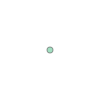

In [7]:
point2


The print statement to get information about the actual definition of these objects:

In [10]:
print(point1)
print(point3D)

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)


<div class="alert alert-info">
    A 3D-point can be recognized from the capital Z -letter in front of the coordinates.
</diV>

Let's check also the data type of our point:

In [13]:
type(point1)

shapely.geometry.point.Point

We can see that the type of the point is shapely's Point. The point object is represented in a specific format based on
[GEOS](https://trac.osgeo.org/geos) C++ library that is one of the standard libraries behind various Geographic Information Systems. It runs under the hood e.g. in [QGIS](http://www.qgis.org/en/site/). 

### Point attributes and functions

Points and other shapely objects have useful built-in [attributes and methods](https://shapely.readthedocs.io/en/stable/manual.html#general-attributes-and-methods). Using the available attributes, we can for example extract the coordinate values of a Point and calculate the Euclidian distance between points.

`geom_type` attribute contains information about  the geometry type of the Shapely object:

In [15]:
point1.geom_type

'Point'

Extracting the coordinates of a Point can be done in a couple of different ways:

`coords` attribute contains the coordinate information as a `CoordinateSequence` which is another data type related to Shapely.

In [16]:
# Get xy coordinate tuple
list(point1.coords)

[(2.2, 4.2)]

Here we have a coordinate tuple inside a list. Using the attributes `x` and `y` it is possible to get the coordinates directly as plain decimal numbers.

In [17]:
# Read x and y coordinates separately
x = point1.x
y = point1.y

In [18]:
print( x, y)

2.2 4.2


<div class="alert alert-info">
It is also possible to calculate the distance between two objects using the [distance](https://shapely.readthedocs.io/en/stable/manual.html#object.distance) method. In our example the distance is calculated in a cartesian coordinate system. When working with real GIS data the distance is based on the used coordinate reference system. always check what is the unit of measurement (for example, meters) in the coordinate reference system you are using.

Let's calculate the distance between `point1` and `point2`:
</diV>

In [21]:
# Check input data
print(point1)
print(point2)

POINT (2.2 4.2)
POINT (7.2 -25.1)


In [23]:
# Calculate the distance between point1 and point2
dist = point1.distance(point2)

# Print out a nicely formatted info message
print("Distance between the points: {0:.2f} units".format(dist))

Distance between the points: 29.72 units


### LineString


Creating LineString -objects is fairly similar to creating Shapely Points. 

Now instead using a single coordinate-tuple we can construct the line using either a list of shapely Point -objects or pass the points as coordinate-tuples:

In [24]:
# Create a LineString from our Point objects
line = LineString([point1, point2, point3])

In [25]:
# It is also possible to produce the same outcome using coordinate tuples
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

In [26]:
# Check if lines are identical
line == line2 

True

Let's see how our line looks like: 

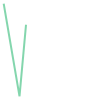

In [27]:
line

In [28]:
print(line)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


As we can see from above, the `line` -variable constitutes of multiple coordinate-pairs.

Check also the data type:

In [29]:
# Check data type of the line object
type(line)

shapely.geometry.linestring.LineString

In [30]:
# Check geometry type of the line object
line.geom_type

'LineString'

### LineString attributes and functions


`LineString` -object has many useful built-in attributes and functionalities. It is for instance possible to extract the coordinates or the length of a LineString (line), calculate the centroid of the line, create points along the line at specific distance, calculate the closest distance from a line to specified Point and simplify the geometry. See full list of functionalities from [Shapely documentation](http://toblerity.org/shapely/manual.html). Here, we go through a few of them.

We can extract the coordinates of a LineString similarly as with `Point`

In [31]:
# Get xy coordinate tuples
list(line.coords)

[(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]

Again, we have a list of coordinate tuples (x,y) inside a list.

If you would need to access all x-coordinates or all y-coordinates of the line, you can do it directly using the `xy` attribute: 

In [32]:
# Extract x and y coordinates separately
xcoords = list(line.xy[0])
ycoords = list(line.xy[1])

In [61]:
print(xcoords)
print(ycoords)

[2.2, 7.2, 9.26]
[4.2, -25.1, -2.456]


It is possible to retrieve specific attributes such as lenght of the line and center of the line (centroid) straight from the LineString object itself:

In [62]:
# Get the lenght of the line
l_length = line.length
print("Length of our line: {0:.2f} units".format(l_length))

Length of our line: 52.46 units


In [63]:
# Get the centroid of the line
print(line.centroid)

POINT (6.229961354035622 -11.892411157572392)


As you can see, the centroid of the line is again a Shapely Point object. 

### Polygon


Creating a `Polygon` -object continues the same logic of how `Point` and `LineString` were created but Polygon object only accepts a sequence of coordinates as input. 

Polygon needs **at least three coordinate-tuples** (three points are reguired to form a surface):

In [36]:
# Create a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

We can also use information from the Shapely Point objects created earlier, but we can't use the point objects directly. Instead, we need to get information of the x,y coordinate pairs as a sequence. We can achieve this by using a list comprehension.

In [37]:
# Create a Polygon based on information from the Shapely points
poly2 = Polygon([[p.x, p.y] for p in [point1, point2, point3]])

In order to understand what just happened, let's check what the list comprehension produces:

In [38]:
[[p.x, p.y] for p in [point1, point2, point3]]

[[2.2, 4.2], [7.2, -25.1], [9.26, -2.456]]

This list of lists was passed as input for creating the Polygon.

In [39]:
# Check that polygon objects created using two different approaches are identical
poly == poly2

True

Let's see how our Polygon looks like: visualize and print

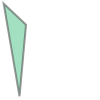

In [40]:
poly

In [41]:
print(poly)

POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))


Note: A `Polygon` representation has double parentheses around the coordinates (i.e. `POLYGON ((<values in here>))` ). This is because Polygon can also have holes inside of it.

Check the data type:

In [42]:
# Data type
type(poly)

shapely.geometry.polygon.Polygon

In [43]:
# Geometry type
poly.geom_type

'Polygon'

In [48]:
# Check the help for Polygon objects:
#help(Polygon) #Remove the hashtag at the beginning of the line and run the cell to see the help documentation for polygon

<div class="alert alert-info">
    
According to the [official documentation](https://shapely.readthedocs.io/en/stable/manual.html#polygons) of Polygon-object, a Polygon can be constructed using exterior coordinates and interior coordinates (optional) where the interior coordinates creates a hole inside the Polygon:
    
</div>

Let's create a `Polygon` with a hole:

In [50]:
# Define the outer border
border = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

In [51]:
# Outer polygon
world = Polygon(shell=border)
print(world)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))


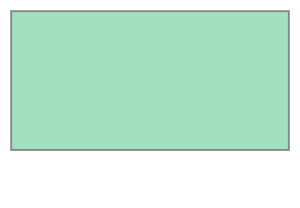

In [52]:
world

In [53]:
# Let's create a single big hole where we leave ten units at the boundaries
# Note: there could be multiple holes, so we need to provide list of coordinates for the hole inside a list
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

In [54]:
# Now we can construct our Polygon with the hole inside
frame = Polygon(shell=border, holes=hole)
print(frame)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))


Let's see what we have now:

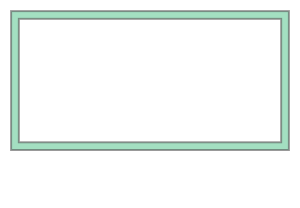

In [55]:
frame

As we can see the `Polygon` has now two different tuples of coordinates. The first one represents the **outerior** and the second one represents the **hole-interior** inside of the Polygon.

### Polygon attributes and functions


We can again access different attributes directly from the `Polygon` object itself that can be really useful for many analyses, such as `area`, `centroid`, `bounding box`, `exterior`, and `exterior-length`. See a full list of methods in the [Shapely User Manual](https://shapely.readthedocs.io/en/stable/manual.html#the-shapely-user-manual).

Here, we can see a few of the available attributes and how to access them:

In [56]:
# Print the outputs
print("Polygon centroid: ", world.centroid)
print("Polygon Area: ",  world.area)
print("Polygon Bounding Box: ", world.bounds)
print("Polygon Exterior: ", world.exterior)
print("Polygon Exterior Length: ", world.exterior.length)

Polygon centroid:  POINT (0 0)
Polygon Area:  64800.0
Polygon Bounding Box:  (-180.0, -90.0, 180.0, 90.0)
Polygon Exterior:  LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Polygon Exterior Length:  1080.0


As we can see above, it is again fairly straightforward to access different attributes from the `Polygon` -object. Note that distance metrics will make more sense when we start working with data in a projected coordinate system.

#### Check your understanding

Plot these shapes using Shapely!

- **Pentagon**, example coords: `(30, 2.01), (31.91, 0.62), (31.18, -1.63), (28.82, -1.63), (28.09, 0.62)` 
- **Triangle**   
- **Square**    
- **Cicrle**    


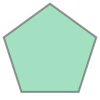

In [57]:
# Pentagon - Coordinates borrowed from this thread: https://tex.stackexchange.com/questions/179843/make-a-polygon-with-automatically-labelled-nodes-according-to-their-coordinates
Polygon([(30, 2.01), (31.91, 0.62), (31.18, -1.63), (28.82, -1.63), (28.09, 0.62)])

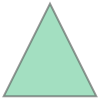

In [58]:
# Triangle
Polygon([(0,0), (2,4), (4,0)])

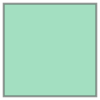

In [59]:
# Square
Polygon([(0,0), (0,4), (4,4), (4,0)])

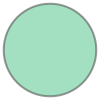

In [60]:
# Circle (using a buffer around a point)
point = Point((0,0))
point.buffer(1)

---

## Geopandas and spatial data analysis

In this section of our notebook we will cover basics functionalities to interact with spatial data in Python using geopandas such as:
- Managing filepaths
- Reading spatial data from file 
- Geometry calculations 
- Writing spatial data to file
- Grouping and splitting spatial data into multiple layers

### Managing filepaths

Built-in module `os` provides many useful functions for interacting with our operating system. One of the most useful submodules in the os package is the [os.path-module](https://docs.python.org/2/library/os.path.html) for manipulating file paths. In case your data are located in different sub-folders, you use `os` path tools to define the filepaths.

Let's import `os` and see how we can construct a filepath by joining a folder path and file name:

In [113]:
import os

# Define path to folder
input_folder = r"../data/vector_data/osm-data/extract"

# Join folder path and filename 
fp = os.path.join(input_folder, "osm_roads.shp")

# Print out the full file path
print(fp)

../data/vector_data/osm-data/extract\osm_roads.shp


### Reading a Shapefile

Esri Shapefile is the default file format when reading in data usign geopandas, so we only need to pass the file path in order to read in our data:

In [114]:
import geopandas as gpd

# Read file using gpd.read_file()
data = gpd.read_file(fp)

In [115]:
data.head()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,Shape_Leng,geometry
0,4701247,5152,cycleway,Leuvenlaan,NaN,B,0,0.0,F,F,397.021076,"LINESTRING (139631.713 455371.729, 139668.474 ..."
1,7004902,5111,motorway,NaN,A28,F,100,0.0,F,F,241.466842,"LINESTRING (141348.352 456008.228, 141486.616 ..."
2,7006534,5141,service,NaN,NaN,B,0,0.0,F,F,97.422979,"LINESTRING (140972.760 455161.884, 140998.415 ..."
3,7006539,5121,unclassified,Lundlaan,NaN,B,0,0.0,F,F,19.178827,"LINESTRING (140678.648 455535.510, 140674.405 ..."
4,7006540,5141,service,NaN,NaN,B,50,0.0,F,F,31.476403,"LINESTRING (140620.841 454865.513, 140620.703 ..."


<AxesSubplot:>

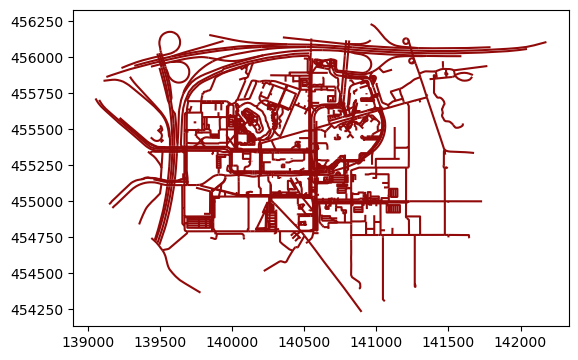

In [120]:
data.plot(color='#910909')

### Reading a Geopackage

After reading and plotting an individual shapefile, let's now read and plot also a geopackage.

In [80]:
import os

# Define path to folder
input_folder = r"../data/vector_data/osm-data"

# Join folder path and filename 
gpkg_path = os.path.join(input_folder, "osm_utrecht_science_park.gpkg")

# Print out the full file path
print(gpkg_path)

../data/vector_data/osm-data\osm_utrecht_science_park.gpkg


As we are going to work with the geopackage and not with individual shapefiles, we need firstly to check the available layers in our geopackage. For this puropse we will use the `.listlayers()` function, from the `fiona` package

In [81]:
import fiona

layer_names = fiona.listlayers(gpkg_path)
print(layer_names)

['osm_buildings', 'osm_landuse', 'osm_natural', 'osm_pois_areas', 'osm_railways', 'osm_roads', 'osm_traffic', 'osm_transport', 'osm_transport_areas', 'osm_water_areas', 'osm_waterways', 'osm_pois']


In [8]:
# # Create an empty list to store the GeoDataFrames for each layer
# layers = []

# # Read each layer into a GeoDataFrame and append it to the list
# for layer_name in layer_names:
#     layer_df = gpd.read_file(gpkg, layer=layer_name)
#     layers.append(layer_df)

In [9]:
# # Combine all layers into a single GeoDataFrame
# import pandas as pd

# combined_gdf = gpd.GeoDataFrame(pd.concat(layers, ignore_index=True), crs=layers[0].crs)

In [78]:
# combined_gdf

<div class="alert alert-info">
    
! **Reading the geopackage itself without specifying the required layers for our analysis, will result into creating a GeoDataFrame with only the first layer from our geopackage**:
    
</div>

In [82]:
import geopandas as gpd

# Read file using gpd.read_file()
data = gpd.read_file(gpkg_path) # This line of code will read only the first layer from the .gpkg file

Lets preview our loaded data

In [83]:
data

,osm_id,code,fclass,name,type,geometry
0,23855553,1500,building,P10-P-Olympos,,"MULTIPOLYGON (((140481.384 455846.029, 140481...."
1,55312411,1500,building,,,"MULTIPOLYGON (((140582.834 455557.404, 140584...."
2,57787338,1500,building,,house,"MULTIPOLYGON (((141357.280 455747.477, 141359...."
3,57788050,1500,building,Oranjerie,house,"MULTIPOLYGON (((141387.264 455880.429, 141388...."
4,57788692,1500,building,Koetshuis,office,"MULTIPOLYGON (((141489.224 455937.260, 141489...."
...,...,...,...,...,...,...
257,1192258827,1500,building,,,"MULTIPOLYGON (((140668.380 455720.654, 140668...."
258,1192258828,1500,building,,,"MULTIPOLYGON (((140668.397 455705.322, 140668...."
259,1196899092,1500,building,,,"MULTIPOLYGON (((140469.348 455448.977, 140474...."
260,1208249315,1500,building,,,"MULTIPOLYGON (((139846.160 455465.755, 139846...."


Check the number of exsting codes and classes in data:

In [101]:
print("Number of rows:", len(data['fclass']),", instead of 3274 in total")
print("---")
print("Number of classes:", data['fclass'].nunique(),", instead of 86 in total")
print("---")
print("Number of codes:", data['code'].nunique(),", instead of 87 in total")
print("---")

Number of rows: 262 , instead of 3274 in total
---
Number of classes: 1 , instead of 86 in total
---
Number of codes: 1 , instead of 87 in total
---


As you can see, we have just loaded only the first layer from our gpkg file and we are missing most of our data. 

<div class="alert alert-info">
    
**For this reason, it is recommended to load you data on an individual basis**, because: 
- you are able to work only with specific layers of your preference without consuming too many resources (i.e. memory),
- ensure that you include all the data from a layer with no conflicts or issues
- have better and well-organized workflow when coding

</div>

We can load our preferred layers from the gpkg file as follows:

In [277]:
#Read layers from GPKG file
water_areas = gpd.read_file(gpkg, layer="osm_water_areas")
buildings = gpd.read_file(gpkg, layer="osm_buildings")
landuse = gpd.read_file(gpkg, layer="osm_landuse")
roads = gpd.read_file(gpkg, layer="osm_roads")
parking = gpd.read_file(gpkg, layer="osm_traffic")

Let's check the data type of one layer:

In [279]:
type(landuse)

geopandas.geodataframe.GeoDataFrame

<div class="alert alert-info">
    
Here we see that our `landuse` -variable is a `GeoDataFrame`. GeoDataFrame extends the functionalities of
`pandas.DataFrame` in a way that it is possible to handle spatial data using similar approaches and datastructures as in pandas (hence the name geopandas). 
    
</div>

Let's check the first rows of "landuse" layer: 

In [280]:
landuse.head()

,osm_id,code,fclass,name,geometry
0,28779642,7218,grass,,"MULTIPOLYGON (((140036.434 455382.357, 140036...."
1,46242206,7202,park,Landgoed Oostbroek,"MULTIPOLYGON (((141269.619 455981.676, 141472...."
2,71396899,7218,grass,,"MULTIPOLYGON (((140190.672 455719.637, 140191...."
3,71396908,7218,grass,,"MULTIPOLYGON (((140018.957 456050.192, 140019...."
4,71396926,7218,grass,,"MULTIPOLYGON (((140925.003 455015.189, 140925...."


### Layer Projection (CRS) & Reprojection

<div class="alert alert-info">
    
When working with geospatial data is always important to check their **Coordinate Reference System (CRS)**, because the geometric shapes-objects in a GeoSeries or GeoDataFrame object are simply a collection of coordinates in an arbitrary space. A CRS tells Python or a GIS software, how those coordinates relate to actual places on the Earth. There are many different CRS out there, but for our demo, we will use the default CRS of the Netherlands the `EPSG:28992` or as it is widely known `Amersfoort/RD New`.
    
</div>

Let's check the CRS of our "landuse" layer using the .crs function of geopandas:

In [124]:
landuse.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

By looking at the output we can see that the `landuse` layer is already projected with the correct CRS, `EPSG:28992`. This sensible, as we (the workshop tutors) have already projected and exported the data for our demo using the appropriate CRS, just to make sure that we will not face any issues with wrong projections.   

Now let's check, if we have also the same CRS for the rest of our layers:

In [140]:
print(water_areas.crs)
print(buildings.crs)
print(roads.crs)
print(parking.crs)

EPSG:28992
EPSG:28992
EPSG:28992
EPSG:28992


Indeed, all the layers are projected with the correct CRS!

In case you want to, you can change the projection of a layer just by using the function .to_crs(). We will try to reproject the parking layer:

In [141]:
reproj_parking = parking.to_crs("WGS 84")

In [142]:
print("Previous projection of 'parking' layer:", parking.crs)
print("New projection of 'parking' layer:", reproj_parking.crs)

Previous projection of 'parking' layer: EPSG:28992
New projection of 'parking' layer: WGS 84


Check the column names:

In [144]:
landuse.columns.values

array(['osm_id', 'code', 'fclass', 'name', 'geometry'], dtype=object)

Let's select only the useful columns and rename them, using more descriptive names:

In [281]:
landuse = landuse[['code', 'fclass',  'geometry']]

Define new column names in a dictionary:

In [282]:
colnames = {'code':'GROUP', 'fclass':'CLASS'}

Rename:

In [283]:
landuse.rename(columns=colnames, inplace=True)

Check the output:

In [284]:
landuse.head()

,GROUP,CLASS,geometry
0,7218,grass,"MULTIPOLYGON (((140036.434 455382.357, 140036...."
1,7202,park,"MULTIPOLYGON (((141269.619 455981.676, 141472...."
2,7218,grass,"MULTIPOLYGON (((140190.672 455719.637, 140191...."
3,7218,grass,"MULTIPOLYGON (((140018.957 456050.192, 140019...."
4,7218,grass,"MULTIPOLYGON (((140925.003 455015.189, 140925...."


#### Check your understanding

Figure out the following information from our input data using your pandas skills:
    
- Number of rows?
- Number of classes?
- Number of groups?


In [285]:
print("Number of rows", len(landuse['CLASS']))
print("Number of classes", landuse['CLASS'].nunique())
print("Number of groups", landuse['GROUP'].nunique())

Number of rows 699
Number of classes 9
Number of groups 9


<div class="alert alert-info">
    
It is always a good idea to explore your data also on a map. Creating a simple map from a `GeoDataFrame` is really easy: you can use ``.plot()`` -function from geopandas that  **creates a map based on the geometries of the data** . Geopandas actually uses matplotlib for plotting.

</div>

Let's try it out, and plot our GeoDataFrame:

<AxesSubplot:>

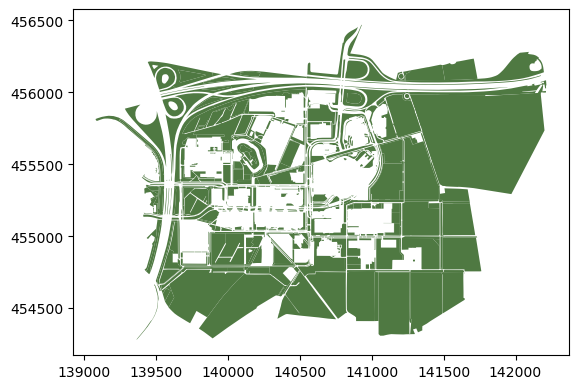

In [286]:
landuse.plot(color="#4F7942")

...Presto! As you can see, it is really easy to produce a map out of your Layer with geopandas. Geopandas automatically positions your map in a way that it covers the whole extent of your data.

## Geometries in Geopandas

Geopandas takes advantage of Shapely's geometric objects. Geometries are stored in a column called *geometry* that is a default column name for
storing geometric information in geopandas.

Let's print the first 5 rows of the column 'geometry':

In [287]:
landuse['geometry'].head()

0    MULTIPOLYGON (((140036.434 455382.357, 140036....
1    MULTIPOLYGON (((141269.619 455981.676, 141472....
2    MULTIPOLYGON (((140190.672 455719.637, 140191....
3    MULTIPOLYGON (((140018.957 456050.192, 140019....
4    MULTIPOLYGON (((140925.003 455015.189, 140925....
Name: geometry, dtype: geometry

As we can see the `geometry` column contains familiar looking values, namely Shapely `MultiPolygon` -objects. Since the spatial data is stored as Shapely objects, **it is possible to use Shapely methods** when dealing with geometries in geopandas.

Let's have a closer look at the multi-polygons and try to apply some of the Shapely methods we are already familiar with.

Let's start by checking the area of the first multi-polygon in the data:

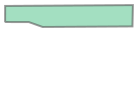

In [288]:
# Access the geometry on the first row of data
landuse.at[0, "geometry"]

In [289]:
# Print information about the area 
print("Area:", round(landuse.at[0, "geometry"].area, 0), "square meters")

Area: 2581.0 square meters



Let's do the same for the first five rows in the data; 

- Iterate over the GeoDataFrame rows using the [`iterrows()` -function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iterrows.html).
- For each row, print the area of the polygon (here, we'll limit the for-loop to a selection of the first five rows):

In [290]:
# Iterate over rows and print the area of a Polygon
for index, row in landuse[0:5].iterrows():
    
    # Get the area from the shapely-object stored in the geometry-column
    poly_area = row['geometry'].area
    
    # Print info
    print("Polygon area at index {index}: {area:.0f} square meters".format(index=index, area=poly_area))

Polygon area at index 0: 2581 square meters
Polygon area at index 1: 494106 square meters
Polygon area at index 2: 1491 square meters
Polygon area at index 3: 3064 square meters
Polygon area at index 4: 299 square meters


<div class="alert alert-info">
    
As you see from here, all **pandas** methods, such as the `iterrows()` function, are directly available in Geopandas without the need to call pandas separately because Geopandas is an **extension** for pandas. 

In practice, it is not necessary to use the iterrows()-approach to calculate the area for all features. Geodataframes and geoseries have an attribute `area` which we can use for accessing the area for each feature at once: 

</div>

In [291]:
landuse.area

0        2581.318902
1      494105.775792
2        1491.171407
3        3063.525326
4         299.146997
           ...      
694       370.373193
695       484.213508
696     13184.877697
697       204.714418
698       166.813827
Length: 699, dtype: float64

Let's next create a new column into our GeoDataFrame where we calculate and store the areas of individual polygons:

In [292]:
# Create a new column called 'area' 
landuse['area'] = landuse.area

Check the output:

In [293]:
landuse['area']

0        2581.318902
1      494105.775792
2        1491.171407
3        3063.525326
4         299.146997
           ...      
694       370.373193
695       484.213508
696     13184.877697
697       204.714418
698       166.813827
Name: area, Length: 699, dtype: float64

These values correspond to the ones we saw in previous step when iterating rows.

Let's check now, what is the `min`, `max` and `mean` of those areas using familiar functions from our previous Pandas lessions.

In [294]:
# Maximum area
round(landuse['area'].max(), 2)

494105.78

In [295]:
# Minimum area
round(landuse['area'].min(), 2)

2.65

In [296]:
# Average area
round(landuse['area'].mean(), 2)

4302.51

## Writing data into a shapefile

It is possible to export GeoDataFrames into various data formats using the [to_file()](http://geopandas.org/io.html#writing-spatial-data) method. In our case, we want to export subsets of the data into Shapefiles (one file for each feature class).

Let's first select one class (class number `36200`, "Lake water") from the data as a new GeoDataFrame:


In [297]:
landuse['CLASS'].unique()

array(['grass', 'park', 'forest', 'meadow', 'farmland', 'scrub',
       'orchard', 'residential', 'allotments'], dtype=object)

In [298]:
# Select a class
selection = landuse.loc[landuse["CLASS"]=="forest"]

Check the selection:

<AxesSubplot:>

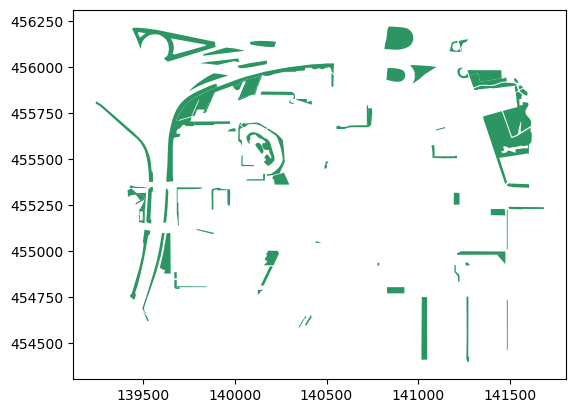

In [299]:
selection.plot(color="#2b9662")

write this layer into a new Shapefile using the `gpd.to_file()` -function:

In [300]:
# Create a output path for the data
output_folder = r"../data/output_vector_data"
output_fp = os.path.join(output_folder, "forest.shp")

In [301]:
# Write those rows into a new file (the default output file format is Shapefile)
selection.to_file(output_fp)

#### Check your understanding

<div class="alert alert-info">

Read the output Shapefile in a new geodataframe, and check that the data looks ok.
</div>

In [302]:
temp = gpd.read_file(output_fp)

In [303]:
# Check first rows
temp.head()

,GROUP,CLASS,area,geometry
0,7201,forest,3196.866510,"POLYGON ((140139.482 455850.298, 140144.427 45..."
1,7201,forest,1179.873207,"POLYGON ((140019.878 455597.651, 140020.848 45..."
2,7201,forest,407.266393,"POLYGON ((141523.177 455895.090, 141529.512 45..."
3,7201,forest,7890.635013,"POLYGON ((141267.000 455983.908, 141343.664 45..."
4,7201,forest,1719.324750,"POLYGON ((140142.550 454813.790, 140191.519 45..."


In [304]:
temp['CLASS'].unique()

array(['forest'], dtype=object)

<AxesSubplot:>

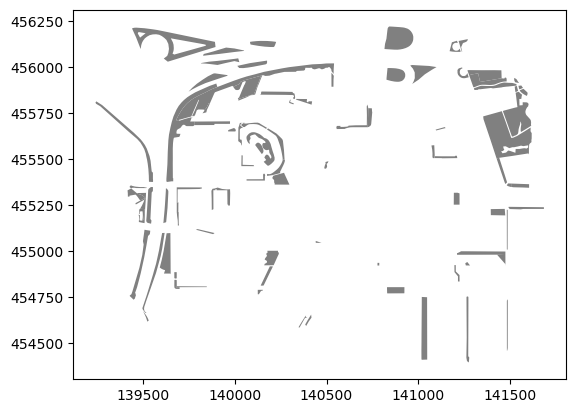

In [341]:
# You can also plot the data for a visual check
temp.plot(color='gray')

## Grouping the Geodataframe

One really useful function that can be used in Pandas/Geopandas is [groupby()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) which groups data based on values on selected column(s).

Next we will automate the file export task; we will group the data based on column `CLASS` and export a shapefile for each class.

Let's continue with the same input file we already read previously into the variable `data`. We also selected and renamed a subset of the columns.

Check again the first rows of our input data:

In [312]:
landuse.head()

,GROUP,CLASS,geometry,area
0,7218,grass,"MULTIPOLYGON (((140036.434 455382.357, 140036....",2581.318902
1,7202,park,"MULTIPOLYGON (((141269.619 455981.676, 141472....",494105.775792
2,7218,grass,"MULTIPOLYGON (((140190.672 455719.637, 140191....",1491.171407
3,7218,grass,"MULTIPOLYGON (((140018.957 456050.192, 140019....",3063.525326
4,7218,grass,"MULTIPOLYGON (((140925.003 455015.189, 140925....",299.146997


The `CLASS` column in the data contains information about different land use types. With `.unique()` -function we can quickly see all different values in that column:

In [314]:
# Print all unique values in the column
landuse['CLASS'].unique()

array(['grass', 'park', 'forest', 'meadow', 'farmland', 'scrub',
       'orchard', 'residential', 'allotments'], dtype=object)


Now we can use that information to group our data and save all land use types into different layers:

In [315]:
# Group the data by class
grouped = landuse.groupby("CLASS")

# Let's see what we have
grouped

<div class="alert alert-info">
    
As we can see, `groupby` -function gives us an object called `DataFrameGroupBy` which is similar to list of keys and values (in a dictionary) that we can iterate over.

</div>   
Check group keys:

In [316]:
grouped.groups.keys()

dict_keys(['allotments', 'farmland', 'forest', 'grass', 'meadow', 'orchard', 'park', 'residential', 'scrub'])

The group keys are unique values from the column by which we grouped the dataframe.

Check the number of rows that each data group has:

In [317]:
# Iterate over the grouped object
for key, group in grouped:

    # Let's check how many rows each group has:
    print('Terrain class:', key)
    print('Number of rows:', len(group), "\n")

Terrain class: allotments
Number of rows: 1 

Terrain class: farmland
Number of rows: 3 

Terrain class: forest
Number of rows: 90 

Terrain class: grass
Number of rows: 560 

Terrain class: meadow
Number of rows: 25 

Terrain class: orchard
Number of rows: 5 

Terrain class: park
Number of rows: 3 

Terrain class: residential
Number of rows: 1 

Terrain class: scrub
Number of rows: 11 



For example, according to the output, there are 90 forest polygons in the input data.

We can also check how the _last_ group looks like (we have the variables in memory from the last iteration of the for-loop):

In [318]:
group.head()

,GROUP,CLASS,geometry,area
38,7217,scrub,"MULTIPOLYGON (((141230.227 455974.264, 141230....",700.517170
268,7217,scrub,"MULTIPOLYGON (((141211.731 455373.356, 141211....",620.218585
304,7217,scrub,"MULTIPOLYGON (((141195.811 455161.361, 141195....",1612.377122
489,7217,scrub,"MULTIPOLYGON (((141212.604 455673.711, 141212....",1453.481393
490,7217,scrub,"MULTIPOLYGON (((141208.493 455518.147, 141211....",850.693003


<div class="alert alert-info">
Notice that the index numbers refer to the row numbers in the original data -GeoDataFrame.
</div>

Check also the data type of the group:

In [320]:
type(group)

geopandas.geodataframe.GeoDataFrame

As we can see, each set of data are now grouped into separate GeoDataFrames, and we can save them into separate files.

### Saving multiple output files

Let's **export each class into a separate Shapefile**. While doing this, we also want to **create unique filenames for each class**.

When looping over the grouped object, information about the class is stored in the variable `key`, and we can use this information for creating new variable names inside the for-loop. For example, we want to name the shapefile containing lake polygons as "terrain_36200.shp".


<div class="alert alert-info">

**String formatting**
    
There are different approaches for formatting strings in Python. Here are a couple of different ways for putting together file-path names using two variables:

```
basename = "terrain"
key = 36200

# OPTION 1. Concatenating using the `+` operator:
out_fp = basename + "_" + str(key) + ".shp"

# OPTION 2. Positional formatting using `%` operator
out_fp = "%s_%s.shp" %(basename, key)
    
# OPTION 3. Positional formatting using `.format()`
out_fp = "{}_{}.shp".format(basename, key)
```
    
Read more from here: https://pyformat.info/
</div>


Let's now export terrain classes into separate Shapefiles.

- First, create a new folder for the outputs:

In [331]:
# Determine output directory
output_folder = r"../data/output_vector_data"

# Create a new folder called 'Results' 
result_folder = os.path.join(output_folder, 'Results')

# Check if the folder exists already
if not os.path.exists(result_folder):
    
    print("Creating a folder for the results...")
    # If it does not exist, create one
    os.makedirs(result_folder)
    
    
else:
    print("Results folder exists already.")

Creating a folder for the results...


At this point, you can go to the file browser and check that the new folder was created successfully.

- Iterate over groups, create a file name, and save group to file:

In [336]:
# Iterate over the groups
for key, group in grouped:
    # Format the filename 
    output_name = "landuse_{}.shp".format(key)

    # Print information about the process
    print("Saving file ...", os.path.basename(output_name))
 
    # Create an output path
    outpath = os.path.join(result_folder, output_name)

    # Export the data
    group.to_file(outpath)

Saving file ... landuse_allotments.shp
Saving file ... landuse_farmland.shp
Saving file ... landuse_forest.shp
Saving file ... landuse_grass.shp
Saving file ... landuse_meadow.shp
Saving file ... landuse_orchard.shp
Saving file ... landuse_park.shp
Saving file ... landuse_residential.shp
Saving file ... landuse_scrub.shp


Perfect! Now we have saved those individual classes into separate Shapefiles and named the file according to the class name. These kind of grouping operations can be really handy when dealing with layers of spatial data. Doing similar process manually would be really laborious and error-prone.

### Save data to csv (Optional)

We can also extract basic statistics from our geodataframe, and save this information as a text file. 

Let's summarize the total area of each group:

In [337]:
area_info = grouped.area.sum().round()

In [338]:
area_info

CLASS
allotments        9249.0
farmland        120017.0
forest          341178.0
grass          1264133.0
meadow          747529.0
orchard          16503.0
park            498222.0
residential       2355.0
scrub             8265.0
Name: area, dtype: float64

- save area info to csv using pandas:

In [339]:
# Create an output path
area_info.to_csv(os.path.join(result_folder, "landuse_class_areas.csv"), header=True)

## Creating a Map with all of our layers

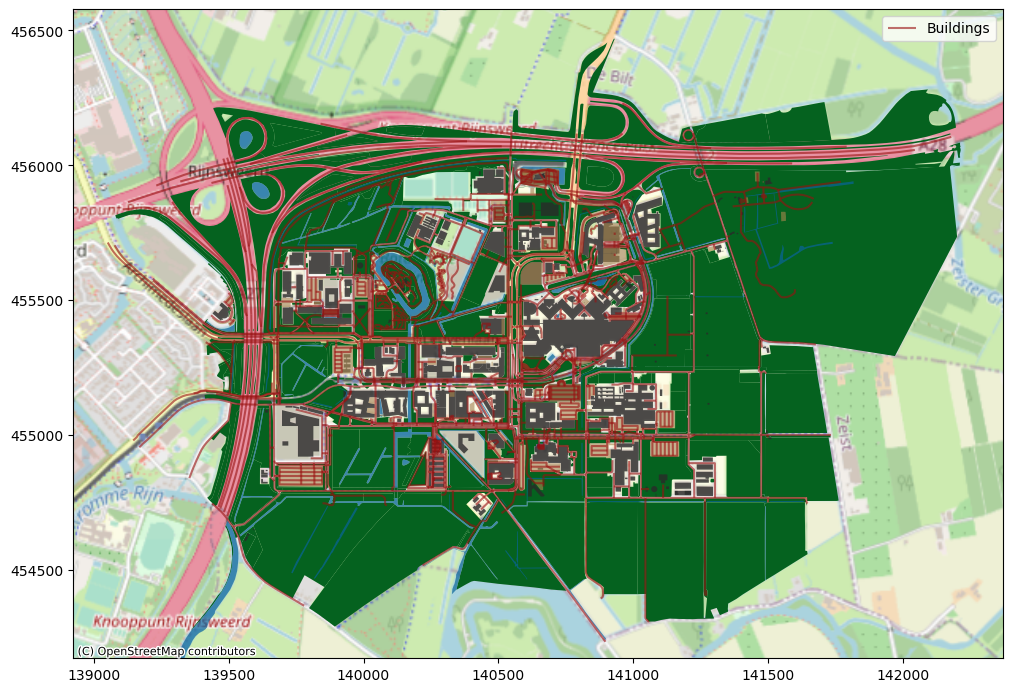

In [381]:
import contextily as ctx # we use this package just to add the Open Street Map (OSM) as a basemap
import matplotlib.pyplot as plt


# Create a base map using OpenStreetMap as a basemap
ax = landuse.plot(figsize=(12, 12), color="#05621f", legend=True)
ctx.add_basemap(ax, crs="EPSG:28992", source=ctx.providers.OpenStreetMap.Mapnik) # with this line we add the OSM as our basemap

# Plot other layers on top of the base map
buildings.plot(ax=ax, color="#2a2a2a", alpha=0.8, label="Buildings")
water_areas.plot(ax=ax, color="#09649b", alpha=0.7, label="Water Areas")
roads.plot(ax=ax, color="#991010", alpha=0.6, label="Roads")
parking.plot(ax=ax, color="#a9874d", alpha=0.6, label="Parking")



# Show the map
plt.show()

## What we learned until now 😎? 

In this section we introduced the first steps of using geopandas. More specifically you should know how to:

1. Read data from Shapefile(.shp) and Geopackage(.gpkg) using geopandas

2. Access geometry information in a geodataframe

4. Write GeoDataFrame data from a geopackage layer using geopandas

5. Automate a task to save specific rows from data into a layer, based on specific key using `groupby()` -function

6. Extra: saving attribute information to a csv file.


 